In [ ]:
import csv

# Specify the input and output file paths
input_file = '/content/sample_data/dataset.txt'
output_file = '/content/sample_data/dataset.txt.csv'

# Open the input file in read mode and output file in write mode
with open(input_file, 'r') as file_in, open(output_file, 'w', newline='') as file_out:
    # Create a CSV writer object
    csv_writer = csv.writer(file_out)

    # Read each line from the input file
    for line in file_in:
        # Split the line into values using a space delimiter
        values = line.strip().split(' ')

        # Write the values to the CSV file
        csv_writer.writerow(values)


In [ ]:
import pandas as pd

# Specify the input and output file paths
input_file = '/content/sample_data/dataset.txt'
output_file = '/content/sample_data/dataset.txt.csv'

# Read the input file into a pandas DataFrame
df = pd.read_csv(input_file, delimiter=' ')

# Drop rows where Province_State is equal to zero
df = df[df['Province_State'] != '0']



print('Conversion complete.')

Conversion complete.


In [ ]:
#If deaths, confirmed rows data is null, replace with 0
df['Deaths'] = df['Deaths'].fillna(0)
df['Confirmed'] = df['Confirmed'].fillna(0) 

print(df)
     

       Province_State Country_Region        Lat       Long     Date  \
0             Alabama             US  32.539527 -86.644082  1/22/20   
1             Alabama             US  30.727750 -87.722071  1/22/20   
2             Alabama             US  31.868263 -85.387129  1/22/20   
3             Alabama             US  32.996421 -87.125115  1/22/20   
4             Alabama             US  33.982109 -86.567906  1/22/20   
...               ...            ...        ...        ...      ...   
325432      Tennessee             US  35.973661 -88.451893   7/6/20   
325433      Tennessee             US  36.289691 -82.125890   7/6/20   
325434      Tennessee             US  36.261362 -87.089036   7/6/20   
325435      Tennessee             US  35.425275 -88.609584   7/6/20   
325436      Tennessee             US  36.483191 -83.659473      NaN   

        Confirmed  Deaths  
0             0.0     0.0  
1             0.0     0.0  
2             0.0     0.0  
3             0.0     0.0  
4      

In [ ]:
#Count total drop rows 
initial_file = pd.read_csv(input_file, delimiter=' ')
initial_rows = initial_file.shape[0] 
dropped_number = initial_rows - df.shape[0]
#count the number of null values
null_deaths = df['Deaths'].isnull().sum()
null_confirmed = df['Confirmed'].isnull().sum()

print("dropped number of rows : " ,dropped_number)
print("number of null values in death : ",null_deaths)
print("number of null values in confirmed: ", null_confirmed)
     


dropped number of rows :  9
number of null values in death :  0
number of null values in confirmed:  0


In [ ]:


print(initial_rows)
print(df.shape[0])
     


325437
325428


In [ ]:


df.to_csv(output_file, index=False)
     


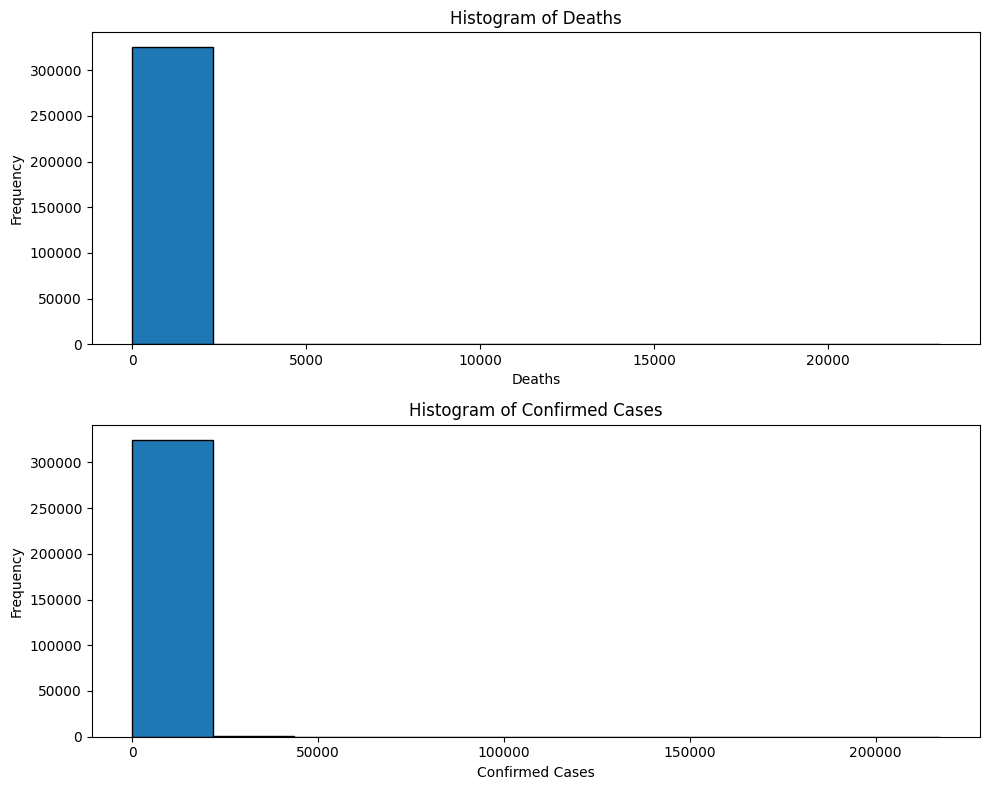

In [ ]:


import matplotlib.pyplot as plt


deaths = df['Deaths']
confirmed = df['Confirmed']

# Create separate subplots for deaths and confirmed cases
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram for deaths
ax1.hist(deaths, bins=10, edgecolor='black')
ax1.set_title('Histogram of Deaths')
ax1.set_xlabel('Deaths')
ax1.set_ylabel('Frequency')

# Plot histogram for confirmed cases
ax2.hist(confirmed, bins=10, edgecolor='black')
ax2.set_title('Histogram of Confirmed Cases')
ax2.set_xlabel('Confirmed Cases')
ax2.set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

     


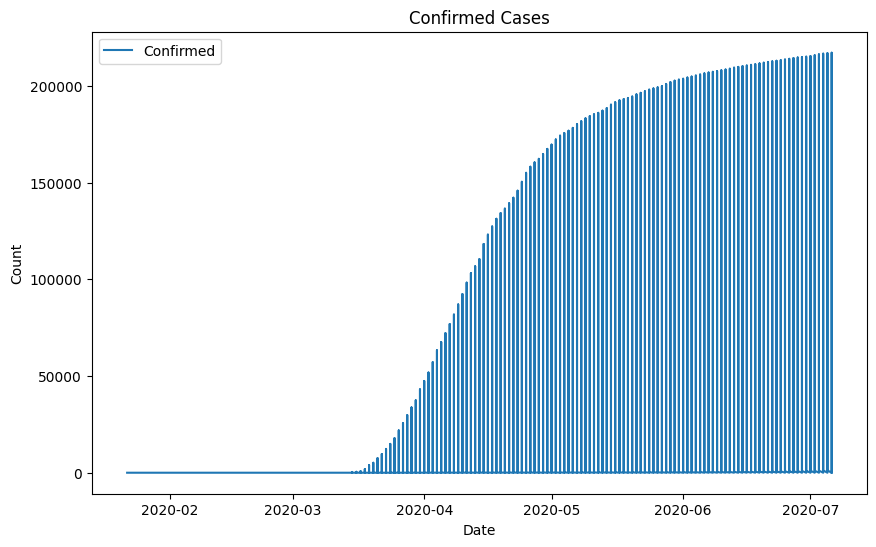

In [ ]:


date = pd.to_datetime(df['Date'])
deaths = df['Deaths']
confirmed = df['Confirmed']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(date, confirmed, label='Confirmed')

# Set the plot title and labels
plt.title('Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Count')

# Customize the legend
plt.legend()

# Display the plot
plt.show()
     


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install streamlit_folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.4/423.4 kB 7.4 MB/s eta 0:00:00


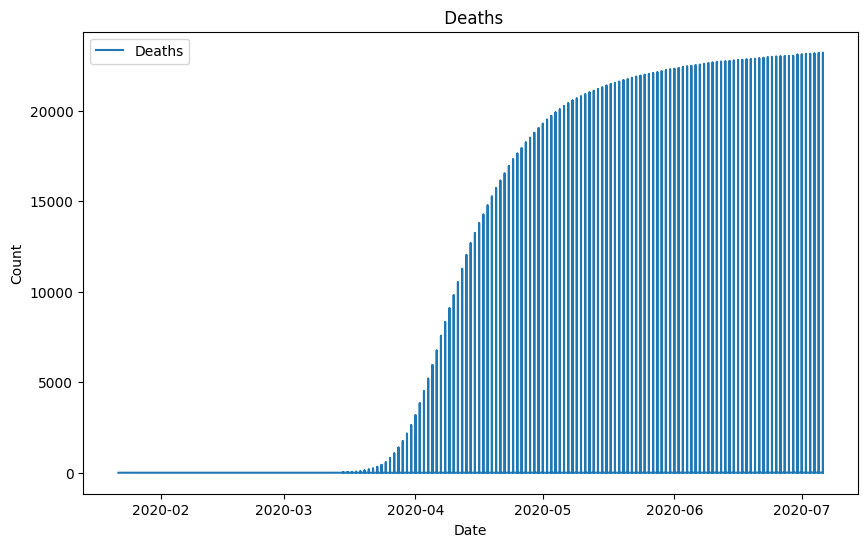

In [ ]:
date = pd.to_datetime(df['Date'])
deaths = df['Deaths']
confirmed = df['Confirmed']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(date, deaths, label='Deaths')

# Set the plot title and labels
plt.title(' Deaths')
plt.xlabel('Date')
plt.ylabel('Count')

# Customize the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:

import streamlit as st
import pandas as pd
import folium
from streamlit_folium import folium_static




# Create a folium map centered on a specific location
map_center = [df['Lat'].mean(), df['Long'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    lat = row['Lat']
    lon = row['Long']
    label = f"Deaths: {row['Deaths']}, Confirmed: {row['Confirmed']}"
    folium.Marker(location=[lat, lon], popup=label).add_to(my_map)

# Display the map using Streamlit
st.title("COVID-19 Locations")
st.markdown("Map showing COVID-19 locations")
folium_static(my_map)

DeltaGenerator()